In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from scipy import stats
import folium as folium
from IPython.display import display
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx





### Lectura del archivo Ohio.json

In [2]:
df= pd.read_json(r"C:\Users\jessi\Desktop\Horizon_Project\Ohio\Ohio.json",lines=True)

In [3]:
df.head()

,user_id,name,rating,text,resp,gmap_id
0,1.039094e+20,Captain Akuunas,3,"Best coffee,tea and many more options,, my fav...",None,0x88388bb5a8ff82f1:0x4319e68a80c5a5eb
1,1.127147e+20,Ikram Yahiani,5,"The food was delicious, and spicy as it suppos...",None,0x88388bb5a8ff82f1:0x4319e68a80c5a5eb
2,1.092344e+20,Mohamed Farah,5,Somalian cuisine very delicious,None,0x88388bb5a8ff82f1:0x4319e68a80c5a5eb
3,1.075823e+20,Muhammad Ibrahim,5,Good,None,0x88388bb5a8ff82f1:0x4319e68a80c5a5eb
4,1.168479e+20,Abdirasaq Abdullahi,5,None,None,0x88388bb5a8ff82f1:0x4319e68a80c5a5eb


### Lectura del archivo "df_gastronomico_ciudades.json "

In [4]:
df2=pd.read_json(r"C:\Users\jessi\Desktop\Horizon_Project\Washington\df_gastronomico_ciudades.json",lines=True)

In [5]:
df2.head()

,nombre_local,direccion,ciudad,codigo_postal_cod_ciudad,codigo_ciudad,codigo_postal,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,price,MISC
0,Creole Orleans Catering & Food Truck,2841 Greenbriar Pkwy SW N317,Atlanta,GA 30331,GA,30331,0x88f503d71429c049:0xef40e07a5479b1c2,33.689032,-84.495097,"[Creole restaurant, Caribbean restaurant, Cate...",4.7,31,None,"{'Service options': ['Delivery', 'Takeout', 'D..."
1,Biswas Grocery and Cafe,2853 Buford Hwy NE,Atlanta,GA 30329,GA,30329,0x88f507f3e1cde31d:0x1bcd2bb2f0555399,33.831454,-84.341647,"[Organic food store, Convenience store, Phone ...",4.7,25,None,"{'Service options': ['Delivery', 'In-store sho..."
2,Noodle Cafe,233 Peachtree St # B70,Atlanta,GA 30303,GA,30303,0x88f5047831dfc86d:0x985e3a6645f5ca4f,33.760404,-84.386319,"[Thai restaurant, Restaurant]",4.2,35,None,"{'Service options': ['Takeout', 'Dine-in', 'De..."
3,Creole Orleans Catering & Food Truck,2841 Greenbriar Pkwy SW N317,Atlanta,GA 30331,GA,30331,0x88f503d71429c049:0xef40e07a5479b1c2,33.689032,-84.495097,"[Creole restaurant, Caribbean restaurant, Cate...",4.7,31,None,"{'Service options': ['Delivery', 'Takeout', 'D..."
4,Biswas Grocery and Cafe,2853 Buford Hwy NE,Atlanta,GA 30329,GA,30329,0x88f507f3e1cde31d:0x1bcd2bb2f0555399,33.831454,-84.341647,"[Organic food store, Convenience store, Phone ...",4.7,25,None,"{'Service options': ['Delivery', 'In-store sho..."


### Informacion General

In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21399 entries, 0 to 21398
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  21399 non-null  float64
 1   name     21399 non-null  object 
 2   rating   21399 non-null  int64  
 3   text     12546 non-null  object 
 4   resp     2373 non-null   object 
 5   gmap_id  21399 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1003.2+ KB
None


In [7]:
print(df2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18037 entries, 0 to 18036
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   nombre_local              18037 non-null  object 
 1   direccion                 18037 non-null  object 
 2   ciudad                    18037 non-null  object 
 3   codigo_postal_cod_ciudad  18037 non-null  object 
 4   codigo_ciudad             18037 non-null  object 
 5   codigo_postal             18037 non-null  object 
 6   gmap_id                   18037 non-null  object 
 7   latitude                  18037 non-null  float64
 8   longitude                 18037 non-null  float64
 9   category                  18037 non-null  object 
 10  avg_rating                18037 non-null  float64
 11  num_of_reviews            18037 non-null  int64  
 12  price                     8690 non-null   object 
 13  MISC                      17614 non-null  object 
dtypes: flo

### Descripción de los dataframe

In [8]:
df['rating'].describe()


count    21399.000000
mean         4.210103
std          1.159118
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [9]:
df2.describe()

,latitude,longitude,avg_rating,num_of_reviews
count,18037.000000,18037.000000,18037.000000,18037.000000
mean,38.290007,-92.404179,4.137573,70.622276
std,4.948144,18.621202,0.575608,143.090909
min,25.993710,-122.805295,1.000000,1.000000
25%,34.055071,-118.186637,3.900000,17.000000
50%,39.943207,-86.808270,4.200000,38.000000
75%,40.831310,-74.145373,4.500000,78.000000
max,47.682747,-71.145040,5.000000,5321.000000


### Análisis de Datos Nulos

In [10]:
print(df.isnull().sum())


user_id        0
name           0
rating         0
text        8853
resp       19026
gmap_id        0
dtype: int64


In [11]:
print(df2.isnull().sum())


nombre_local                   0
direccion                      0
ciudad                         0
codigo_postal_cod_ciudad       0
codigo_ciudad                  0
codigo_postal                  0
gmap_id                        0
latitude                       0
longitude                      0
category                       0
avg_rating                     0
num_of_reviews                 0
price                       9347
MISC                         423
dtype: int64


### Outliers

Outliers en la columna 'rating' usando IQR:
5        1
7        1
23       1
25       1
43       2
        ..
21264    1
21272    1
21274    1
21375    1
21395    2
Name: rating, Length: 2155, dtype: int64
Outliers en la columna 'rating' usando Z-score:
Series([], Name: rating, dtype: int64)


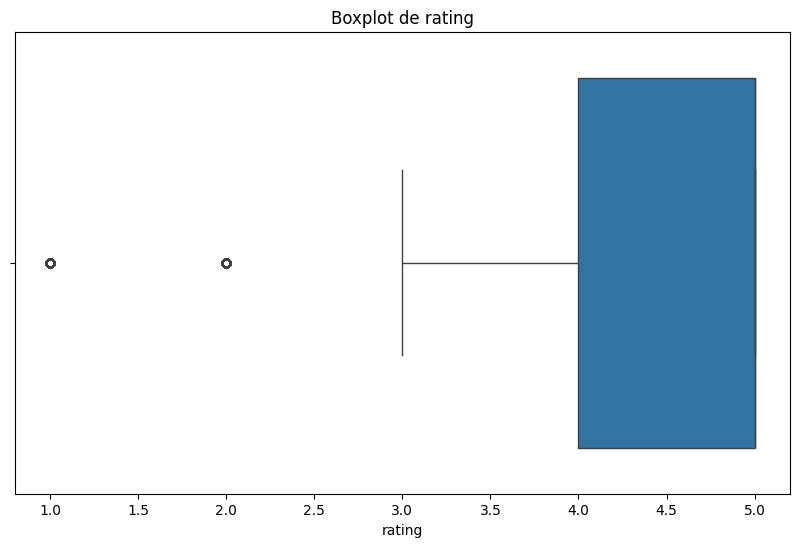

In [12]:
rating = df['rating']

# Calcular el IQR para la columna 'rating'
Q1 = rating.quantile(0.25)
Q3 = rating.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers usando IQR
outliers_iqr = rating[(rating < (Q1 - 1.5 * IQR)) | (rating > (Q3 + 1.5 * IQR))]
print("Outliers en la columna 'rating' usando IQR:")
print(outliers_iqr)

# Calcular Z-score para la columna 'rating'
z_scores = stats.zscore(rating)
abs_z_scores = abs(z_scores)

# Identificar outliers con Z-score mayor que 3
outliers_z = rating[abs_z_scores > 3]
print("Outliers en la columna 'rating' usando Z-score:")
print(outliers_z)

# Graficar el boxplot para 'rating'
plt.figure(figsize=(10, 6))
sns.boxplot(x=rating)
plt.title('Boxplot de rating')
plt.show()


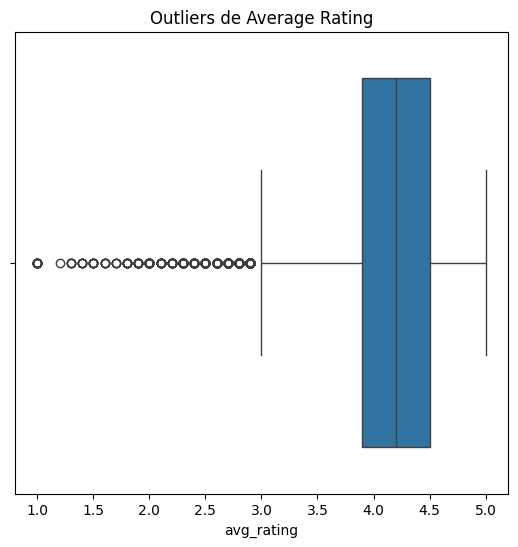

In [13]:


columns_to_check = ['avg_rating']

Q1 = df2[columns_to_check].quantile(0.25)
Q3 = df2[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = df2[(df2[columns_to_check] < (Q1 - 1.5 * IQR)) | (df2[columns_to_check] > (Q3 + 1.5 * IQR))]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df2['avg_rating'])
plt.title('Outliers de Average Rating')



plt.show()



Outliers en la columna 'num_of_reviews' usando IQR:
124      798
206      178
217      496
224      214
229      768
        ... 
18019    238
18024    244
18027    292
18029    178
18031    238
Name: num_of_reviews, Length: 1371, dtype: int64
Outliers en la columna 'num_of_reviews' usando Z-score:
124       798
229       768
233      1018
237      3128
238      1373
         ... 
17884     798
17890    1108
17892    1208
17893    1351
17901     624
Name: num_of_reviews, Length: 171, dtype: int64


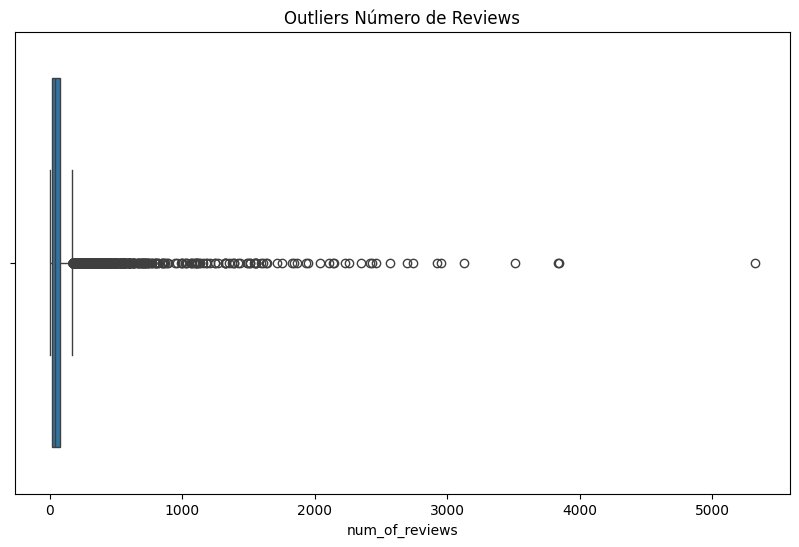

In [14]:

num_of_reviews = df2['num_of_reviews']

Q1 = num_of_reviews.quantile(0.25)
Q3 = num_of_reviews.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = num_of_reviews[(num_of_reviews < (Q1 - 1.5 * IQR)) | (num_of_reviews > (Q3 + 1.5 * IQR))]
print("Outliers en la columna 'num_of_reviews' usando IQR:")
print(outliers_iqr)

z_scores = stats.zscore(num_of_reviews)
abs_z_scores = abs(z_scores)

outliers_z = num_of_reviews[abs_z_scores > 3]
print("Outliers en la columna 'num_of_reviews' usando Z-score:")
print(outliers_z)

plt.figure(figsize=(10, 6))
sns.boxplot(x=num_of_reviews)
plt.title('Outliers Número de Reviews')
plt.show()


### Histogramas de distribución

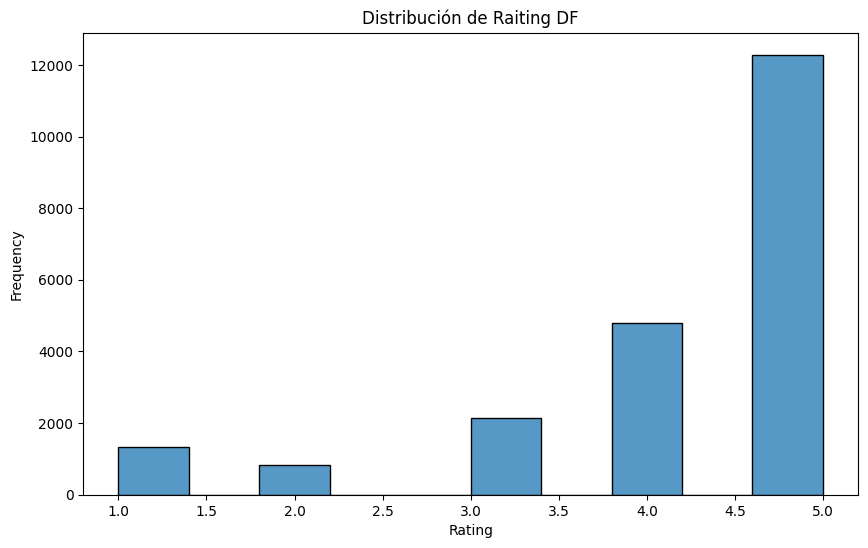

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df['rating'], bins=10)
plt.title('Distribución de Raiting DF')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


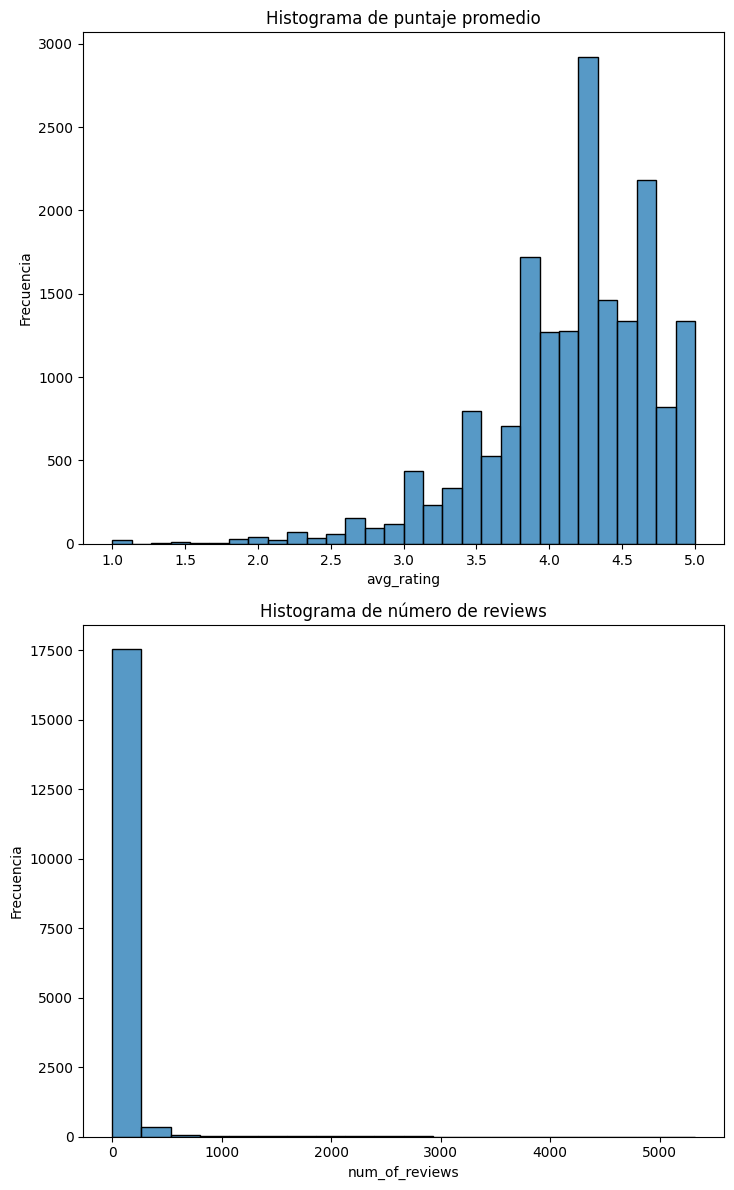

In [16]:
avg_rating = df2['avg_rating']
num_of_reviews = df2['num_of_reviews']

plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
sns.histplot(avg_rating, bins=30, kde=False)
plt.title('Histograma de puntaje promedio')
plt.xlabel('avg_rating')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 3)
sns.histplot(num_of_reviews, bins=20, kde=False)
plt.title('Histograma de número de reviews')
plt.xlabel('num_of_reviews')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


### Análisis de sentimientos 

In [17]:
df['text'] = df['text'].fillna('')


In [18]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['review_sentiment'] = df['text'].apply(get_sentiment)

print(df[['text', 'review_sentiment']].head())


                                                text  review_sentiment
0  Best coffee,tea and many more options,, my fav...             0.625
1  The food was delicious, and spicy as it suppos...             1.000
2                    Somalian cuisine very delicious             1.000
3                                               Good             0.700
4                                                                0.000


Text(0, 0.5, 'Frecuencia')

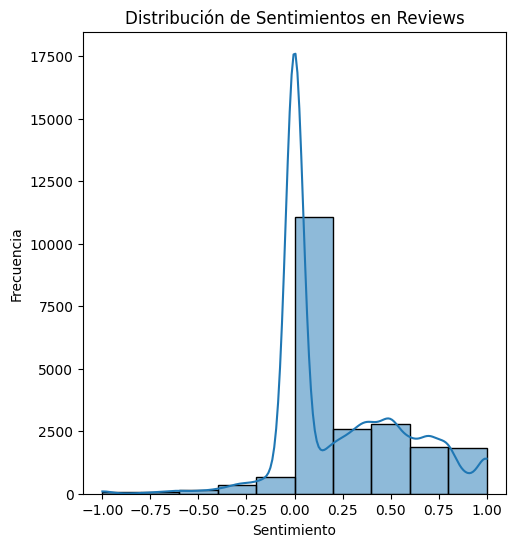

In [19]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['review_sentiment'], bins=10, kde=True)
plt.title('Distribución de Sentimientos en Reviews')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')


### Unión de datasets

In [20]:
merged_df = pd.merge(df, df2, on='gmap_id', how='inner')


In [21]:
merged_df

,user_id,name,rating,text,resp,gmap_id,review_sentiment,nombre_local,direccion,ciudad,codigo_postal_cod_ciudad,codigo_ciudad,codigo_postal,latitude,longitude,category,avg_rating,num_of_reviews,price,MISC
0,1.039094e+20,Captain Akuunas,3,"Best coffee,tea and many more options,, my fav...",None,0x88388bb5a8ff82f1:0x4319e68a80c5a5eb,0.625,Aaran Somalian Middle East Restaurant,3296 Westerville Rd,Columbus,OH 43224,OH,43224,40.035520,-82.953014,"[Restaurant, East African restaurant, Ethiopia...",4.4,28,None,"{'Service options': ['Takeout', 'Dine-in', 'De..."
1,1.039094e+20,Captain Akuunas,3,"Best coffee,tea and many more options,, my fav...",None,0x88388bb5a8ff82f1:0x4319e68a80c5a5eb,0.625,Aaran Somalian Middle East Restaurant,3296 Westerville Rd,Columbus,OH 43224,OH,43224,40.035520,-82.953014,"[Restaurant, East African restaurant, Ethiopia...",4.4,28,None,"{'Service options': ['Takeout', 'Dine-in', 'De..."
2,1.127147e+20,Ikram Yahiani,5,"The food was delicious, and spicy as it suppos...",None,0x88388bb5a8ff82f1:0x4319e68a80c5a5eb,1.000,Aaran Somalian Middle East Restaurant,3296 Westerville Rd,Columbus,OH 43224,OH,43224,40.035520,-82.953014,"[Restaurant, East African restaurant, Ethiopia...",4.4,28,None,"{'Service options': ['Takeout', 'Dine-in', 'De..."
3,1.127147e+20,Ikram Yahiani,5,"The food was delicious, and spicy as it suppos...",None,0x88388bb5a8ff82f1:0x4319e68a80c5a5eb,1.000,Aaran Somalian Middle East Restaurant,3296 Westerville Rd,Columbus,OH 43224,OH,43224,40.035520,-82.953014,"[Restaurant, East African restaurant, Ethiopia...",4.4,28,None,"{'Service options': ['Takeout', 'Dine-in', 'De..."
4,1.092344e+20,Mohamed Farah,5,Somalian cuisine very delicious,None,0x88388bb5a8ff82f1:0x4319e68a80c5a5eb,1.000,Aaran Somalian Middle East Restaurant,3296 Westerville Rd,Columbus,OH 43224,OH,43224,40.035520,-82.953014,"[Restaurant, East African restaurant, Ethiopia...",4.4,28,None,"{'Service options': ['Takeout', 'Dine-in', 'De..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21430,1.114471e+20,Peet,5,,None,0x88388ec0b31899bd:0x2ccb76b63a1dcd2b,0.000,Catfish Biff's Pizza & Subs,75 W 11th Ave,Columbus,OH 43201,OH,43201,39.995172,-83.009399,"[Pizza restaurant, Takeout Restaurant, Pizza d...",4.5,174,$,"{'Service options': ['Delivery', 'Takeout'], '..."
21431,1.102955e+20,Hoodo Tv,2,,None,0x88388ec0b31899bd:0x2ccb76b63a1dcd2b,0.000,Catfish Biff's Pizza & Subs,75 W 11th Ave,Columbus,OH 43201,OH,43201,39.995172,-83.009399,"[Pizza restaurant, Takeout Restaurant, Pizza d...",4.5,174,$,"{'Service options': ['Delivery', 'Takeout'], '..."
21432,1.167910e+20,Zachary Weber,5,,None,0x88388ec0b31899bd:0x2ccb76b63a1dcd2b,0.000,Catfish Biff's Pizza & Subs,75 W 11th Ave,Columbus,OH 43201,OH,43201,39.995172,-83.009399,"[Pizza restaurant, Takeout Restaurant, Pizza d...",4.5,174,$,"{'Service options': ['Delivery', 'Takeout'], '..."
21433,1.178719e+20,Greg Massey,4,,None,0x88388ec0b31899bd:0x2ccb76b63a1dcd2b,0.000,Catfish Biff's Pizza & Subs,75 W 11th Ave,Columbus,OH 43201,OH,43201,39.995172,-83.009399,"[Pizza restaurant, Takeout Restaurant, Pizza d...",4.5,174,$,"{'Service options': ['Delivery', 'Takeout'], '..."


### Gráfico de los 20 restaurants con más reviews

In [22]:
local_comment_counts = merged_df['nombre_local'].value_counts().reset_index()
local_comment_counts.columns = ['nombre_local', 'num_of_reviews']

# Seleccionar los 20 locales con más comentarios
top_locals = local_comment_counts.head(20)

# Mostrar el ranking
print(top_locals)

                  nombre_local  num_of_reviews
0         Incline Public House            1774
1                       Subway            1075
2     Cazuelas Mexican Cantina             754
3                    Starbucks             718
4           Whole Foods Market             528
5            Papa John's Pizza             475
6                Donatos Pizza             393
7                 Jimmy John's             307
8                      Wendy's             295
9                Asian Kitchen             277
10                Panera Bread             266
11  St. Bernard Shurfine Foods             239
12                   Pizza Hut             239
13            Queen City Pizza             228
14    Dancing Roll - Hyde Park             216
15       Moe's Southwest Grill             199
16    DELICIO Coal Fired Pizza             193
17                       Oshio             168
18                    Fusabowl             167
19              Domino's Pizza             166


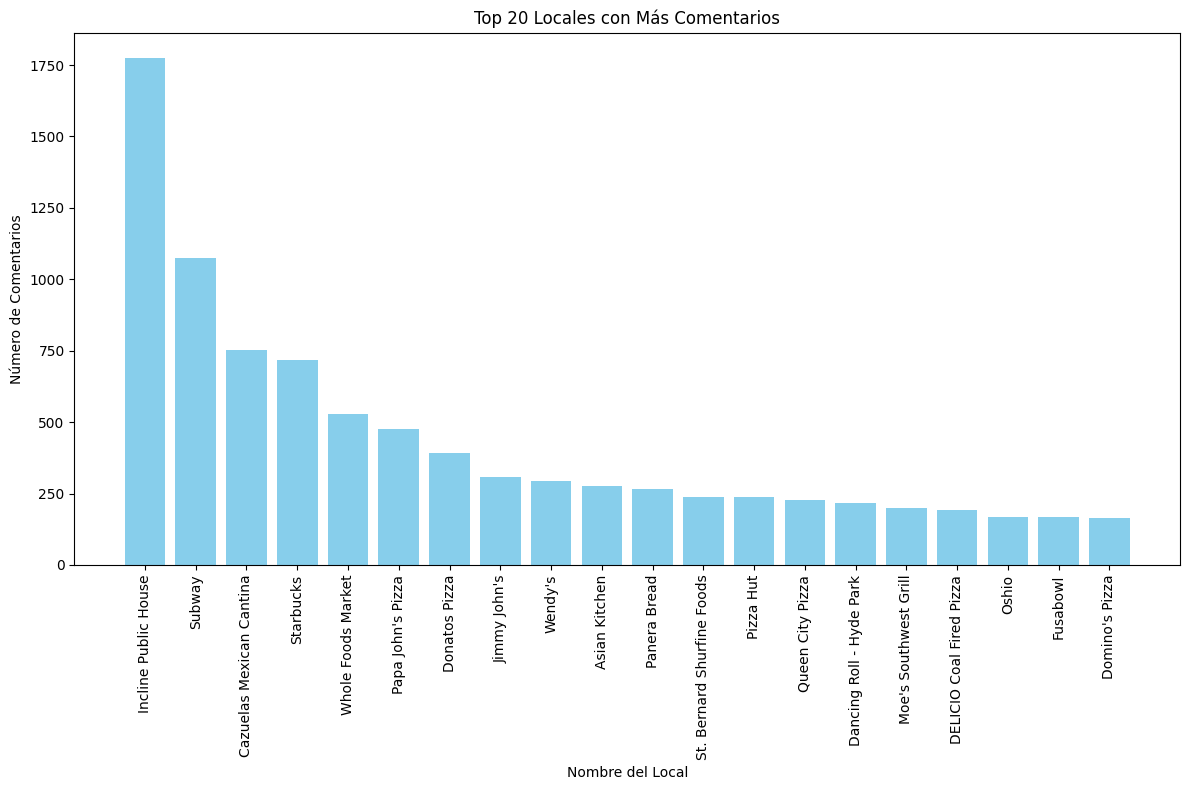

In [23]:
plt.figure(figsize=(12, 8))
plt.bar(top_locals['nombre_local'], top_locals['num_of_reviews'], color='skyblue')

plt.xlabel('Nombre del Local')
plt.ylabel('Número de Comentarios')
plt.title('Top 20 Locales con Más Comentarios')
plt.xticks(rotation=90)  

plt.tight_layout()
plt.show()

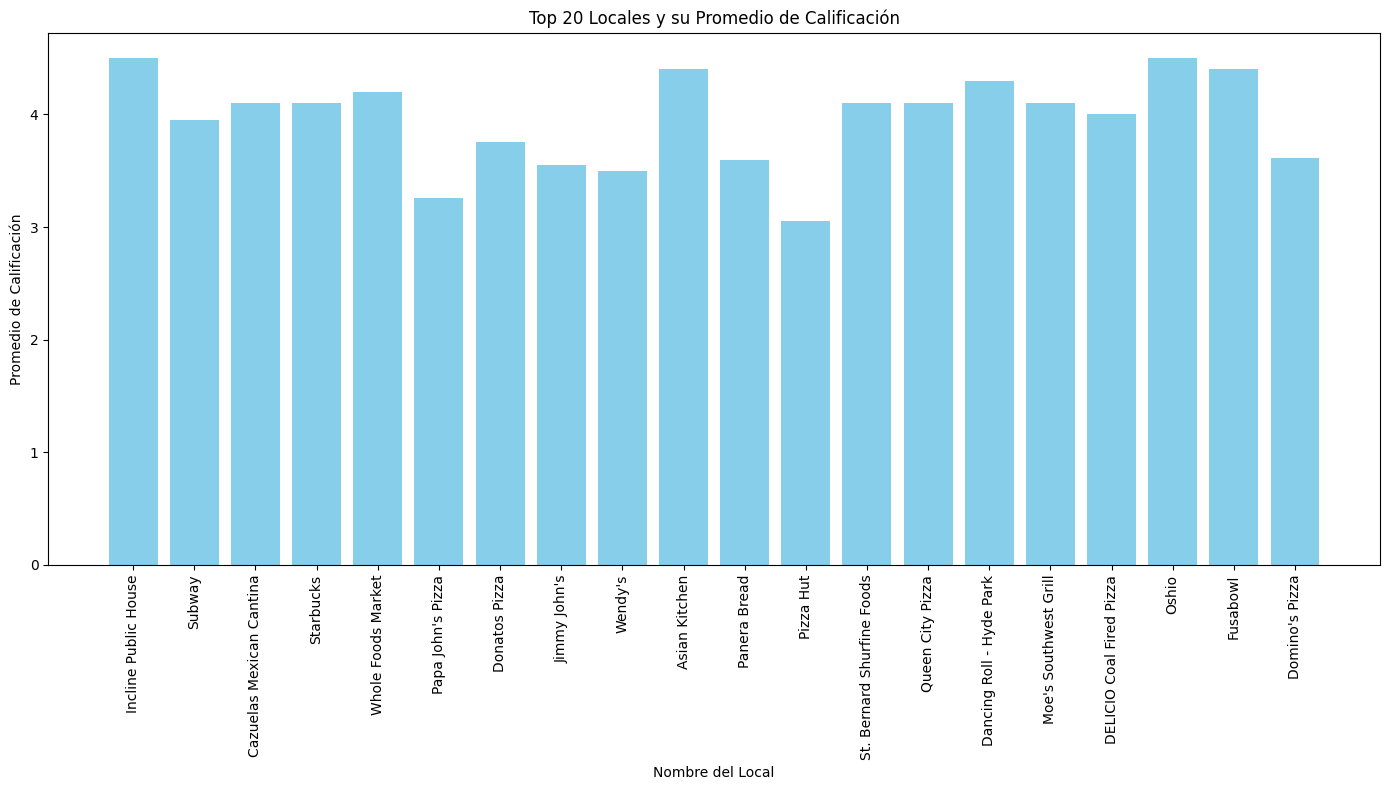

In [24]:
local_comment_counts = merged_df.groupby('nombre_local').agg(
    num_of_reviews=('nombre_local', 'count'),
    avg_rating=('avg_rating', 'mean')
).reset_index()

top_locals = local_comment_counts.sort_values(by='num_of_reviews', ascending=False).head(20)

plt.figure(figsize=(14, 8))
plt.bar(top_locals['nombre_local'], top_locals['avg_rating'], color='skyblue')

plt.xlabel('Nombre del Local')
plt.ylabel('Promedio de Calificación')
plt.title('Top 20 Locales y su Promedio de Calificación')
plt.xticks(rotation=90)  

plt.tight_layout()
plt.show()


In [25]:
merged_df.to_csv(r"C:\Users\jessi\Desktop\Proyecto Final Henry\Ohio.csv", index=False)
